### what's inside???

1. Как получены данные?
2. Как из них сделать датасет?
3. На что отнормировать показания датчиков?

In [1]:
import pyreadr as py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!pwd

/home/ildar.lomov/playground/tennessee_eastman_diploma/notebooks/epoch_2_ildar_proto


In [4]:
#reading train data in .R format
a1 = py.read_r("../../data/raw/TEP_FaultFree_Training.RData")
a2 = py.read_r("../../data/raw/TEP_Faulty_Training.RData")

In [5]:
#reading test data in .R format
a3 = py.read_r("../../data/raw/TEP_FaultFree_Testing.RData")
a4 = py.read_r("../../data/raw/TEP_Faulty_Testing.RData")

In [6]:
# concatinating the train and the test dataset

# train dataframe
raw_train = pd.concat([a1['fault_free_training'], a2['faulty_training']])
# test dataframe
raw_test = pd.concat([a3['fault_free_testing'], a4['faulty_testing']])

In [79]:
a1['fault_free_training'].shape

(250000, 55)

In [80]:
a2['faulty_training'].shape

(5000000, 55)

In [7]:
raw_train.groupby(['faultNumber','simulationRun']).size()

faultNumber  simulationRun
0.0          1.0              500
             2.0              500
             3.0              500
             4.0              500
             5.0              500
                             ... 
20.0         496.0            500
             497.0            500
             498.0            500
             499.0            500
             500.0            500
Length: 10500, dtype: int64

In [8]:
raw_test.groupby(['faultNumber','simulationRun']).size()

faultNumber  simulationRun
0            1.0              960
             2.0              960
             3.0              960
             4.0              960
             5.0              960
                             ... 
20           496.0            960
             497.0            960
             498.0            960
             499.0            960
             500.0            960
Length: 10500, dtype: int64

In [14]:
raw_train.head(10)

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
5,0.0,1.0,6,0.29303,3691.7,4502.2,9.3780,27.111,41.999,2703.8,...,53.595,28.898,59.107,22.291,38.673,39.890,47.571,47.430,41.308,19.134
6,0.0,1.0,7,0.24301,3658.8,4541.6,9.3374,26.623,42.448,2704.0,...,53.548,23.558,62.125,22.244,40.429,35.816,45.514,47.508,41.338,17.625
7,0.0,1.0,8,0.24090,3653.3,4500.0,9.3495,27.075,42.412,2704.9,...,54.045,23.765,62.006,22.702,40.300,39.807,43.364,47.344,40.899,18.156
8,0.0,1.0,9,0.29416,3654.3,4454.7,9.3213,27.363,42.238,2703.2,...,54.083,28.697,61.623,22.064,38.976,38.066,45.381,47.483,40.876,18.146
9,0.0,1.0,10,0.29372,3675.9,4487.4,9.4107,26.809,42.144,2705.3,...,53.692,28.741,61.490,22.409,39.615,38.309,47.296,47.513,42.355,18.957


как получены данные???
Каждую ошибку генерят отдельно
Всего 21 ошибка, по 500 запусков с этой ошибкой длинны 960 семплов для теста и 500 для трейна

Для теста получается 
21*500*960 = 10080000 строчек в таблице (замеров)

для трейна получается 
21 * 500 * 500 = 5250000 строчек в таблице (замеров)

А как понять, что ну вот теперь то точно случилась поломка??

The TEP variables (columns 4 to 55) were sampled every 3 minutes for a total duration of 25 hours and 48 hours respectively. Note that the faults were introduced 1 and 8 hours into the Faulty Training and Faulty Testing datasets, respectively.

UHH??

For Fault Zero , i.e under normal operating condition, total samples taken were 20000, i.e for 40 simulation runs.
For rest of the faults, for training data, fault is introduced after 1 hour of the simulation run, since each sample is sampled at 3mins, Sampled Train dataset is constructed by taking first 25 simulation runs and ignoring first 20 samples of each of the 25 simulations.

Кароч, ошибка в Train появляется начиная с 1 го часа, тоесть на 21 измерение, так как они делаются каждые 3 минуты
Этот перец предлагает семплить следущим образом. Потом он еще предалагет использовать еще 9 runs на кросвалидацию. и 10 runs из теста, где он игнорирует первые 160 измерений (первые 8 часов), чтобы данные сразу начали показывать гавно.



In [61]:
Еще вадная инфа

FYI
про xmeas и xmv:
The process has 53 variables, including 22 process measurements,
19 analyzer measurements, and 12 manipulated variables.
Our evaluation results presented here focus on all the
process measurements and 11 manipulated variables, where the
remaining constant manipulated variable was ignored. We did
not consider the analyzer measurements.

SyntaxError: invalid syntax (<ipython-input-61-4c28b20eb2b8>, line 1)

In [18]:
25 * 60 / 3

500.0

In [33]:
sampled_train = raw_train[((raw_train.faultNumber == 0.0) & (raw_train.simulationRun <= 10.)) | ((raw_train.faultNumber == 1.0) & (raw_train.simulationRun <= 10.))]


sampled_test = raw_test[((raw_test.faultNumber == 0.0) & (raw_test.simulationRun <= 10.)) | ((raw_test.faultNumber == 1.0) & (raw_test.simulationRun <= 10.))]




In [34]:
sampled_test.shape

(19200, 55)

In [27]:
!mkdir -p ../../data/raw/sampled_TEP

In [35]:
pd.to_pickle(sampled_train, "../../data/raw/sampled_TEP/sampled_train.pkl")

In [36]:
pd.to_pickle(sampled_test, "../../data/raw/sampled_TEP/sampled_test.pkl")

In [49]:
train_sampled = pd.read_pickle("../../data/raw/sampled_TEP/sampled_train.pkl")

In [50]:
train_sampled.shape

(10000, 55)

In [51]:
train_sampled.head(1)

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.232,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.51,41.258,18.447


In [53]:
train_sampled.index.unique().shape

(9500,)

In [37]:
!pwd

/home/ildar.lomov/playground/tennessee_eastman_diploma/notebooks/epoch_2_ildar_proto


In [19]:
500*10*2

10000

In [56]:
raw_train.loc[240818, :]

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
240818,0.0,482.0,319,0.28160,3638.6,4495.3,9.2024,26.857,42.336,2705.1,...,54.515,27.979,61.281,21.807,37.157,34.923,47.908,47.615,40.458,18.020
240818,2.0,25.0,319,0.29538,3711.6,4688.8,9.6519,27.097,42.848,2684.1,...,55.452,28.688,62.086,20.653,81.194,36.794,44.658,23.510,41.433,17.462


In [59]:
raw_train = raw_train.sort_values(by=["faultNumber", "simulationRun", "sample"], ascending=True).reset_index(drop=True)

In [60]:
raw_train.index.unique().shape

(5250000,)

In [40]:
raw_train.faultNumber.unique().shape

(21,)

In [ ]:
raw_train[raw_train.faultNumber == 0.0]

In [12]:
raw_train.shape

(5250000, 55)

In [ ]:
raw_test.shape

In [42]:
raw_test.iloc[:, 3:].head()

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.25171,3672.4,4466.3,9.5122,27.057,42.473,2705.6,74.750,120.41,0.33642,...,54.494,24.527,59.710,22.357,40.149,40.074,47.955,47.300,42.100,15.345
1,0.25234,3642.2,4568.7,9.4145,26.999,42.586,2705.2,75.126,120.38,0.33801,...,53.269,24.465,60.466,22.413,39.956,36.651,45.038,47.502,40.553,16.063
2,0.24840,3643.1,4507.5,9.2901,26.927,42.278,2703.5,74.540,120.38,0.33702,...,54.000,24.860,60.642,22.199,40.074,41.868,44.553,47.479,41.341,20.452
3,0.25153,3628.3,4519.3,9.3347,26.999,42.330,2703.9,74.861,120.38,0.33648,...,53.860,24.553,61.908,21.981,40.141,40.066,48.048,47.440,40.780,17.123
4,0.21763,3655.8,4571.0,9.3087,26.901,42.402,2707.7,74.380,120.40,0.32114,...,53.307,21.775,61.891,22.412,37.696,38.295,44.678,47.530,41.089,18.681


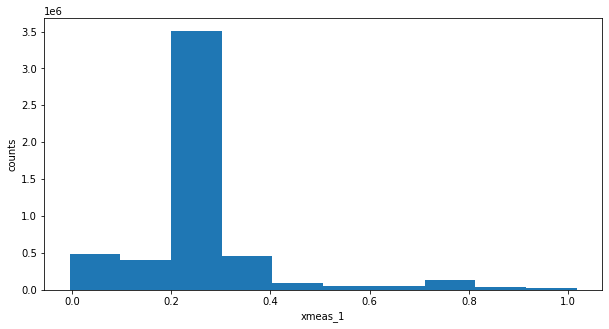

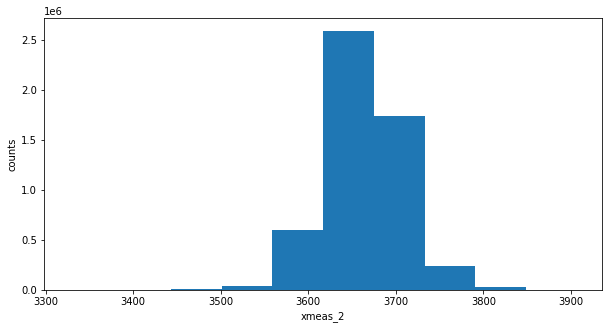

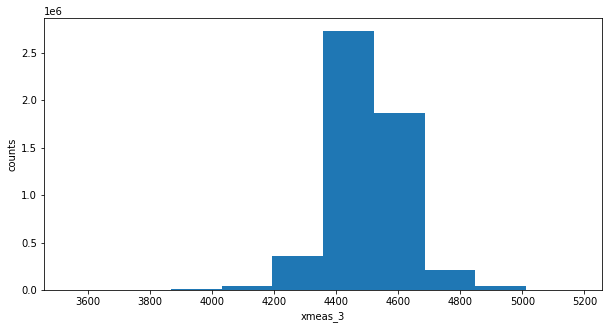

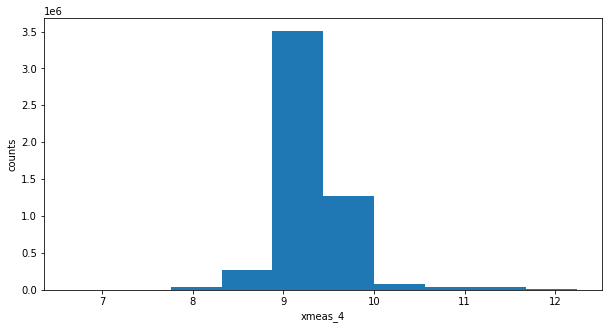

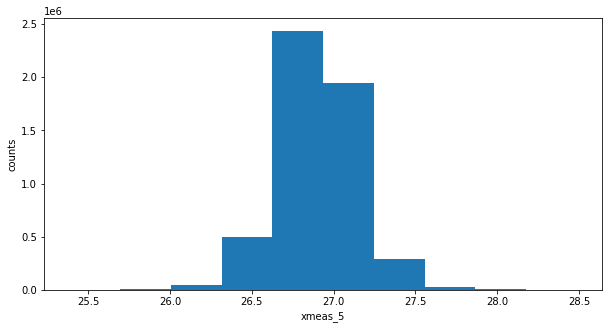

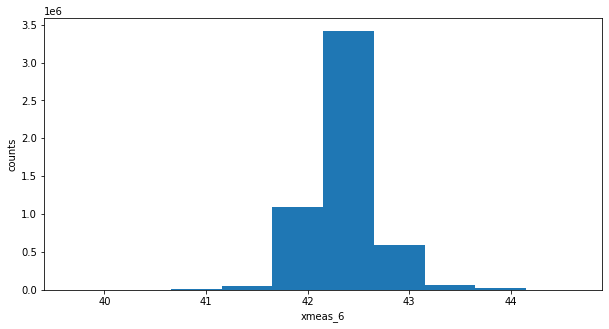

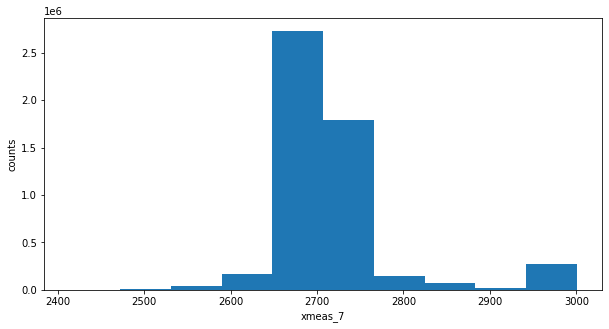

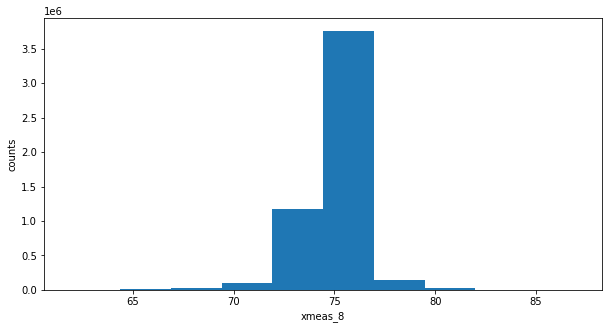

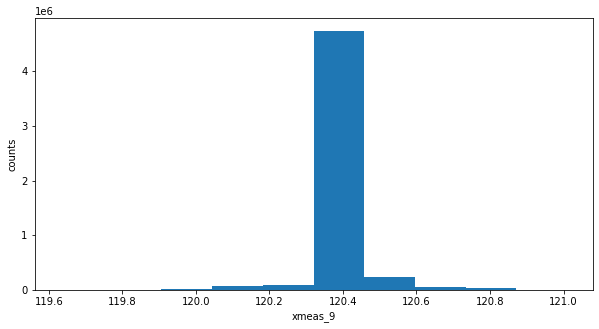

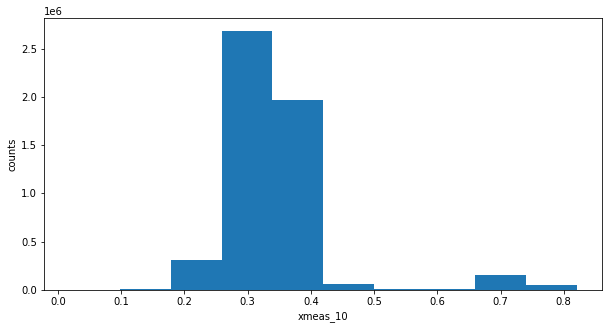

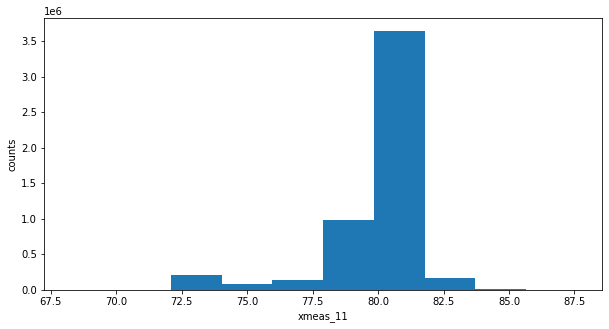

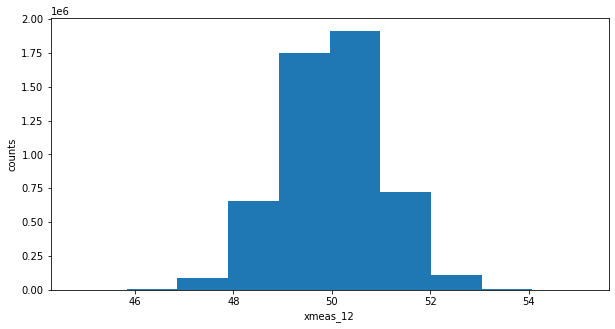

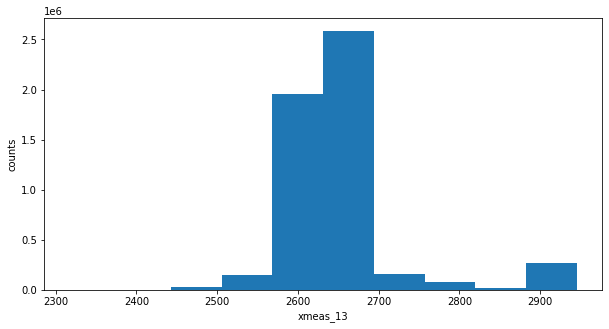

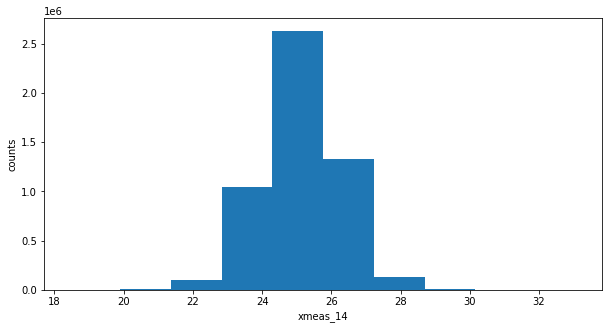

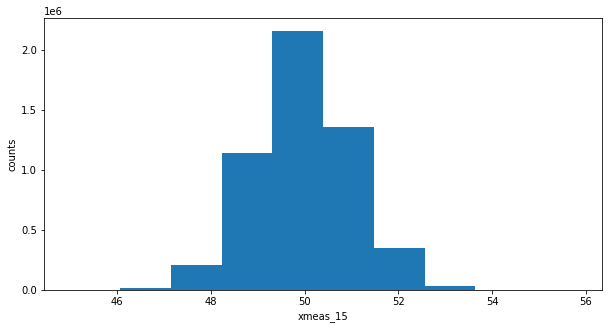

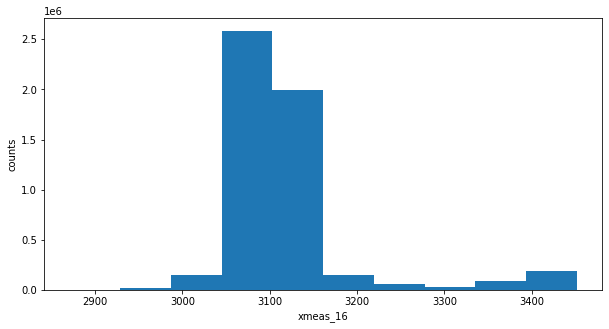

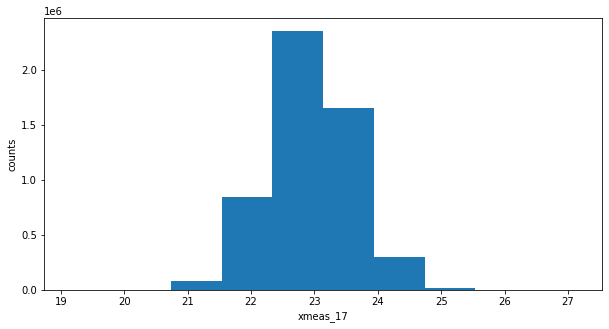

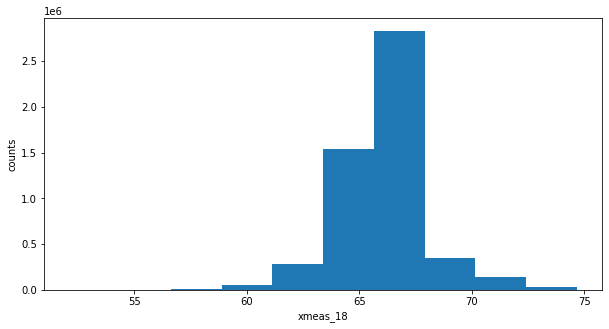

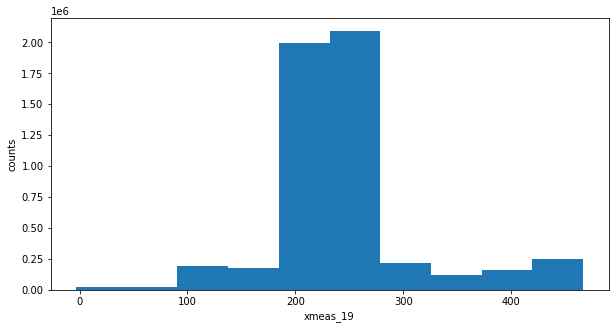

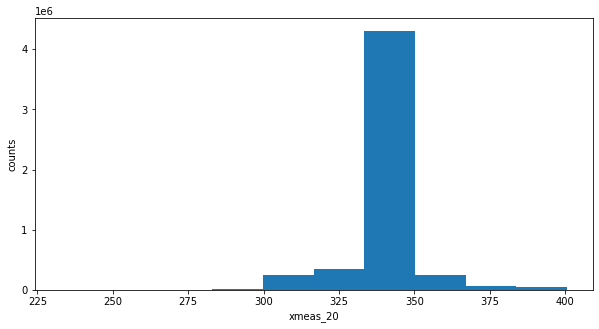

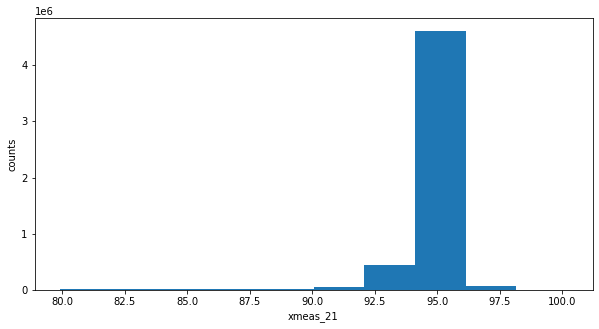

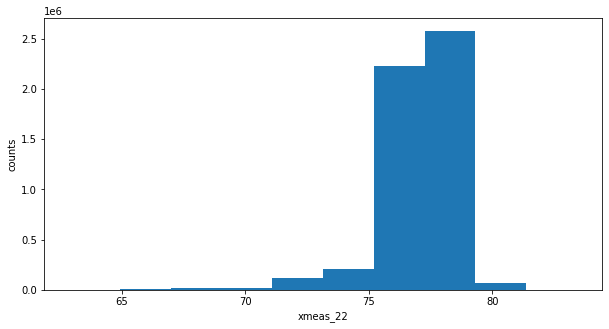

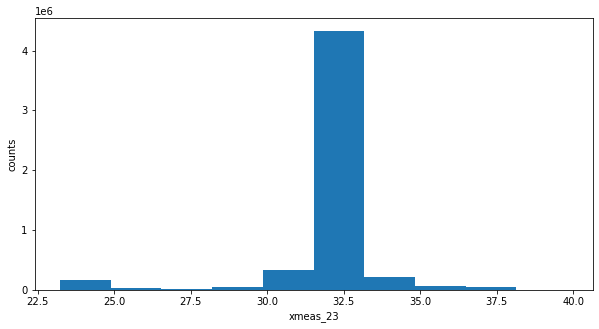

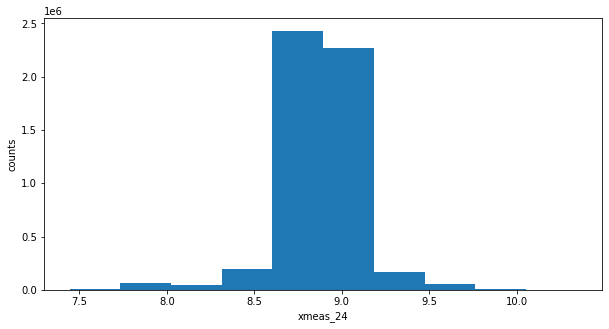

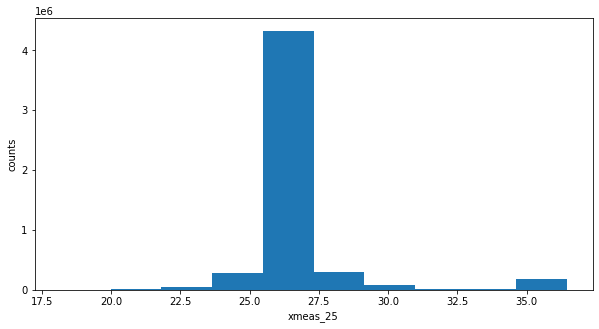

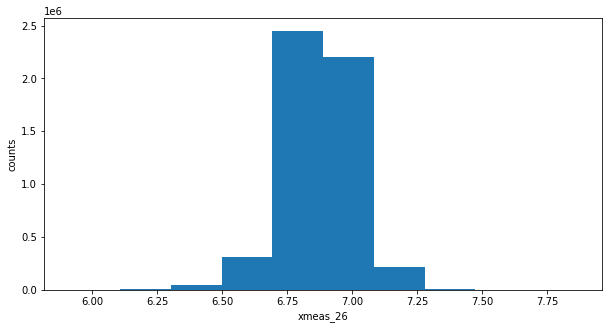

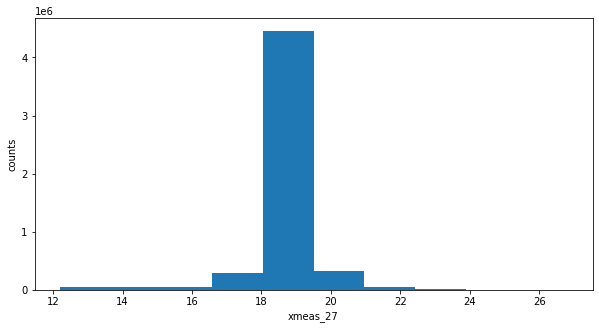

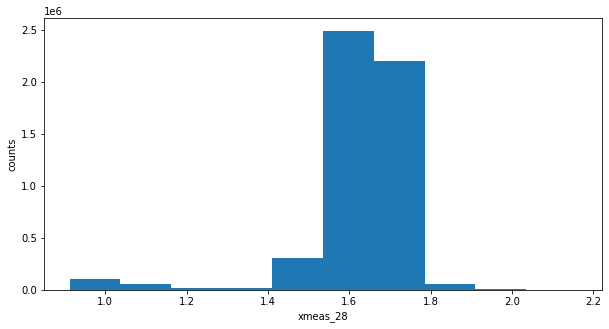

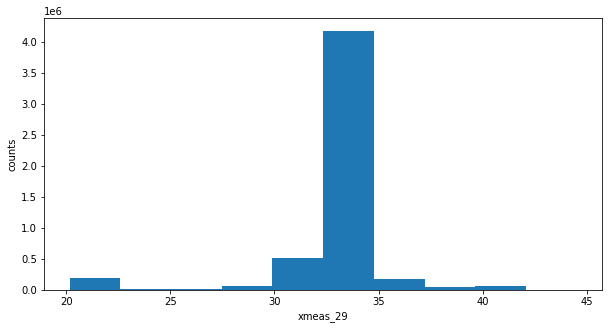

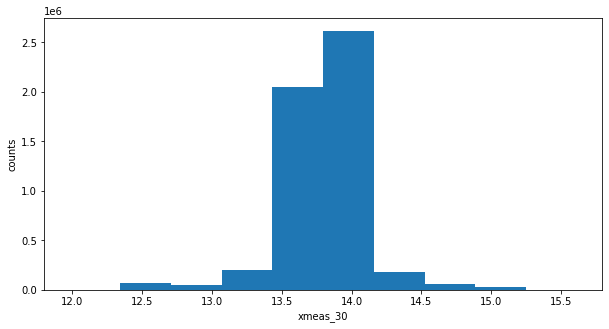

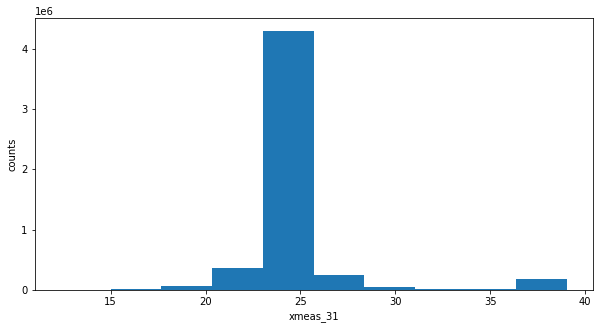

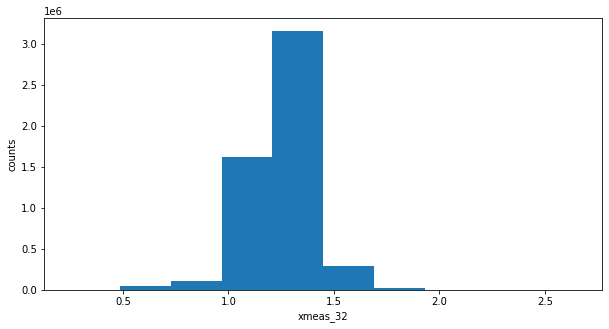

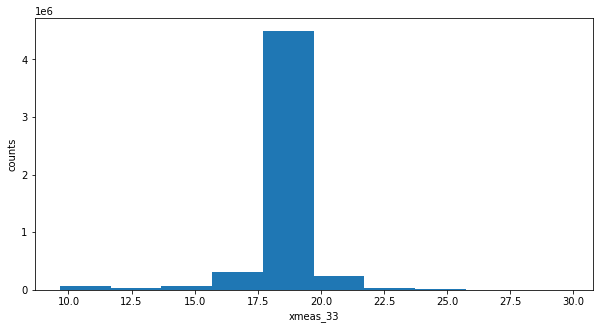

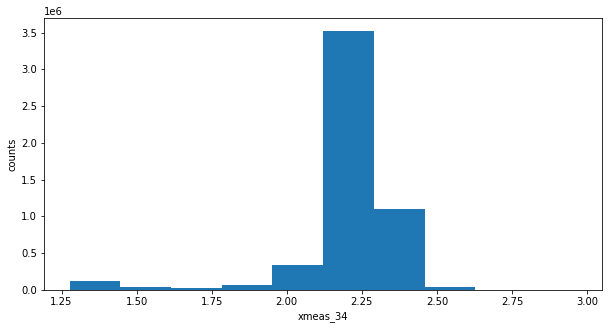

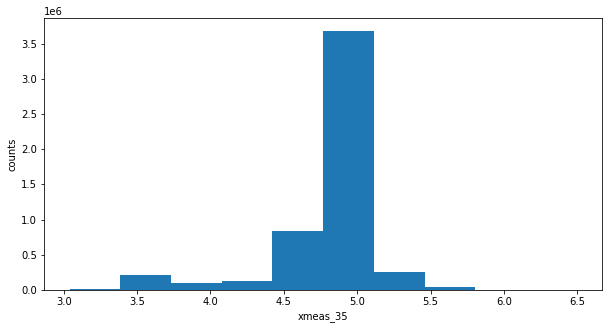

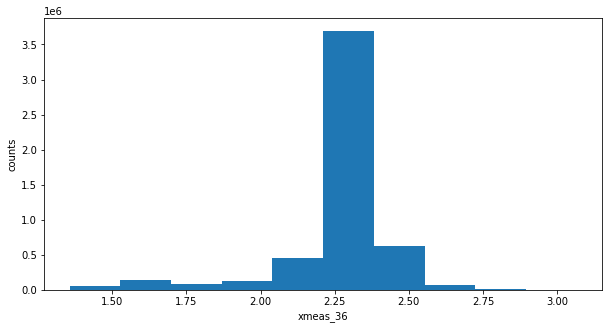

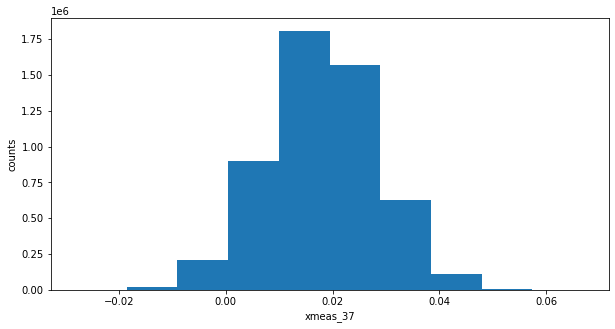

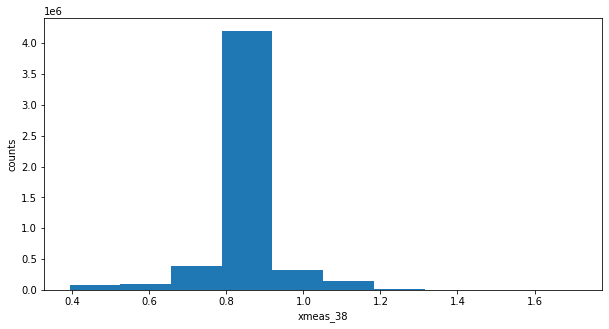

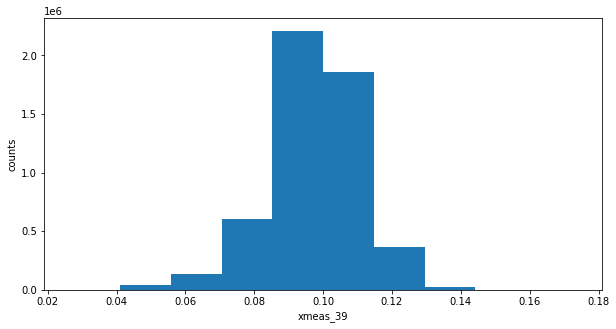

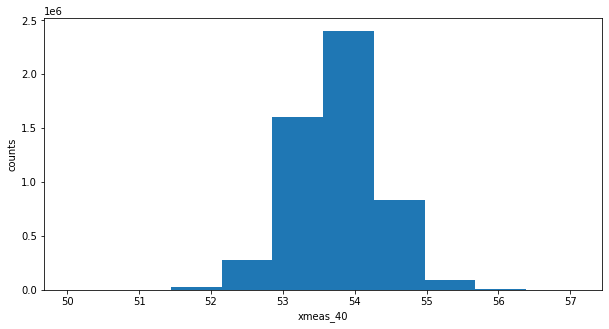

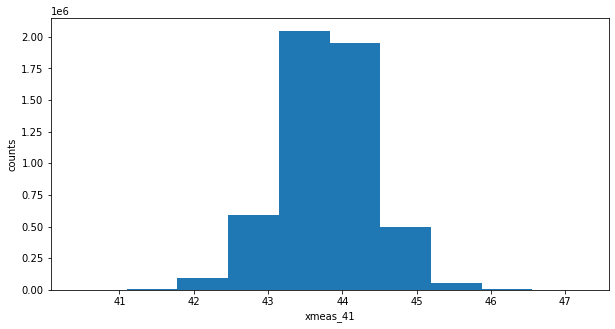

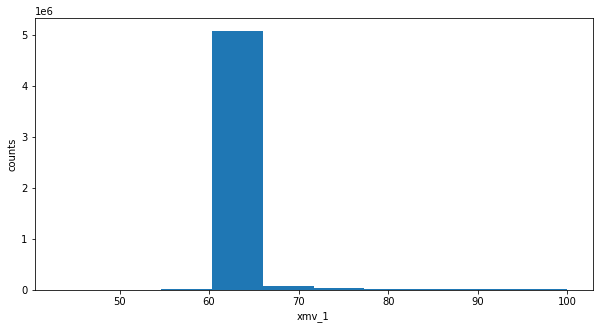

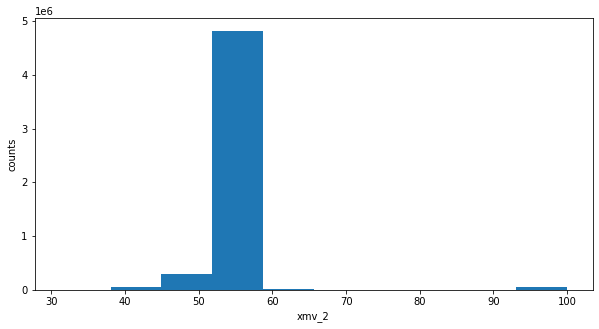

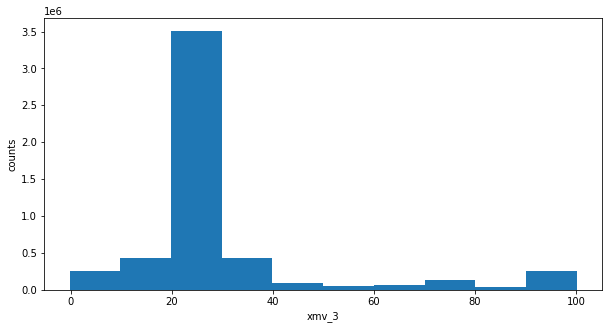

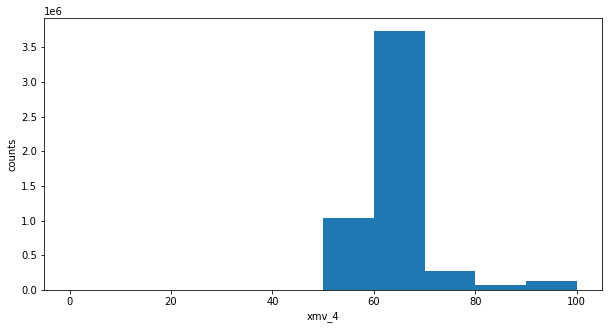

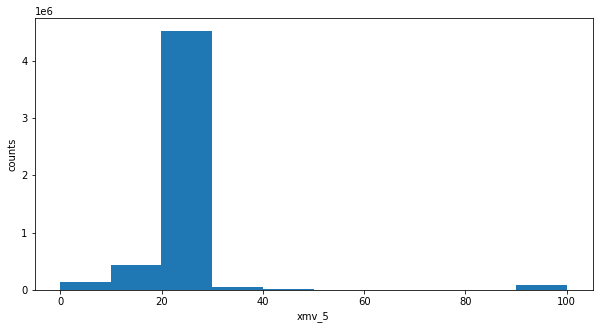

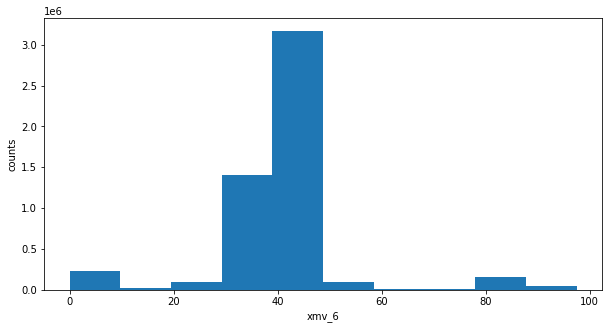

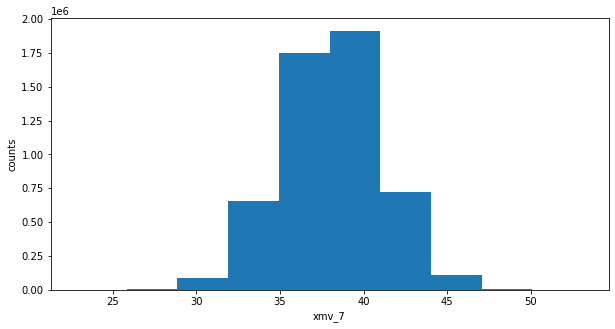

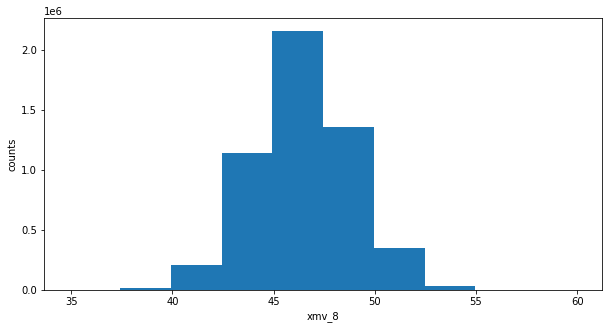

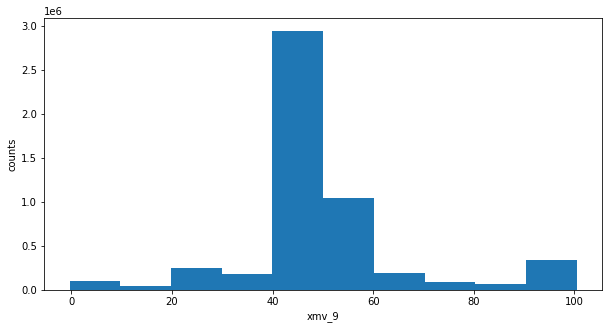

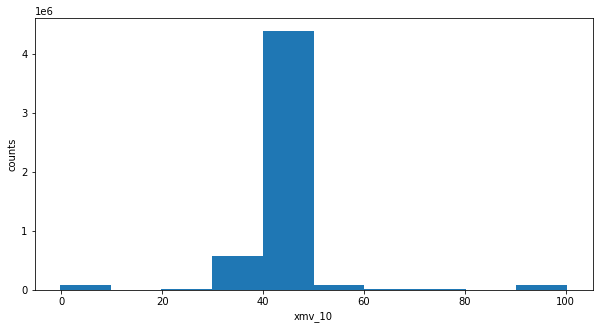

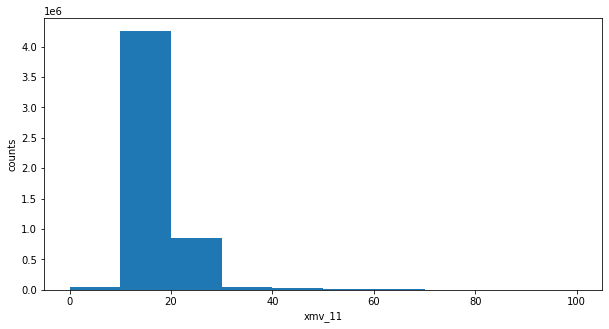

In [9]:
for col in raw_train.columns[3:]:
    plt.figure(figsize=(10,5))
    plt.hist(raw_train[col])
    plt.xlabel(col)
    plt.ylabel('counts')
    plt.show()

## Normalisation investigation
Идея - это отнормировать (вычесть среднее и разделить на корень из дисперсию) каждое из 52 измерений, которые используются в модели.
Для того чтобы модлеь не переобучалась на разные масштабы признаков и тд
Для этого мы просто вычислим их по каждому измерению в train данных и возьмем эт оза константы в наших моделях


In [62]:
raw_train.shape

(5250000, 55)

In [63]:
raw_train.head(1)

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.232,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.51,41.258,18.447


In [65]:
train_desc = raw_train.iloc[:, 3:].describe()

In [78]:
train_desc.loc[["mean", "std"], :].to_numpy().sum()

19331.39195800897

In [74]:
aaa = np.array([[2.60840858e-01, 3.66377732e+03, 4.50617786e+03, 9.36923827e+00,
        2.69015887e+01, 4.23629281e+01, 2.72214950e+03, 7.48879855e+01,
        1.20400165e+02, 3.45964586e-01, 7.97595706e+01, 4.99911334e+01,
        2.65009318e+03, 2.51278907e+01, 4.99602615e+01, 3.12043499e+03,
        2.29341076e+01, 6.60021453e+01, 2.45631346e+02, 3.40393308e+02,
        9.44453643e+01, 7.70417501e+01, 3.19695759e+01, 8.87928867e+00,
        2.67706384e+01, 6.87406150e+00, 1.87129541e+01, 1.62878283e+00,
        3.26362489e+01, 1.38005826e+01, 2.45676048e+01, 1.25263230e+00,
        1.84738666e+01, 2.22216904e+00, 4.78166224e+00, 2.26500141e+00,
        1.79840572e-02, 8.39498723e-01, 9.74103505e-02, 5.37502095e+01,
        4.37929296e+01, 6.34920553e+01, 5.43011737e+01, 3.01559485e+01,
        6.31554539e+01, 2.29196979e+01, 3.99292803e+01, 3.80739037e+01,
        4.64420345e+01, 5.04799097e+01, 4.19082559e+01, 1.88092347e+01],
       [1.46108322e-01, 4.27775994e+01, 1.08699840e+02, 3.56353638e-01,
        2.31067726e-01, 3.13270067e-01, 7.42791897e+01, 1.31549486e+00,
        7.12738852e-02, 8.39785381e-02, 1.75978445e+00, 1.00239752e+00,
        7.48534843e+01, 1.10013251e+00, 1.01898255e+00, 7.70199802e+01,
        6.47620653e-01, 1.81705510e+00, 6.79386884e+01, 1.10078217e+01,
        1.26817415e+00, 1.38709666e+00, 1.73842414e+00, 2.20576788e-01,
        1.92120125e+00, 1.32540424e-01, 9.37602836e-01, 1.24616031e-01,
        2.61142746e+00, 2.85954033e-01, 2.95828205e+00, 1.45611523e-01,
        1.31335193e+00, 1.70181173e-01, 3.40819579e-01, 1.81953767e-01,
        1.01740871e-02, 9.02880601e-02, 1.32383930e-02, 5.81193812e-01,
        6.07383024e-01, 3.26951438e+00, 5.13291828e+00, 2.00389841e+01,
        7.23875632e+00, 1.08172496e+01, 1.26262137e+01, 2.94991280e+00,
        2.35821751e+00, 1.71937564e+01, 9.77333948e+00, 5.06438809e+00]])

In [77]:
aaa.sum()

19331.3919534842